In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [11]:
# raw data
raw = pd.read_csv('owid-energy-data.csv')

In [22]:
energyshares = ['country','year','fossil_share_energy','low_carbon_share_energy','biofuel_share_energy', 'coal_share_energy', 'gas_share_energy', 'hydro_share_energy', 'nuclear_share_elec', 'oil_share_energy', 'renewables_share_energy', 'solar_share_energy', 'wind_share_energy' ]
energyShare = raw[energyshares]
energyShare = energyShare[energyShare['year'] == 2020] # clustering for most recent year
#print(energyShare.isna().sum().sum()) # 1369 NaN values

energyShare[energyShare.isna().any(axis=1)] # 189 rows with NaN 

energyShare = energyShare.dropna() 
energyShare.reset_index(level=0, inplace=True)

In [23]:
# MODEL 1: KMeans Clustering
kmeans = KMeans(n_clusters=3) # how many clusters should we do ?e
cluster = kmeans.fit(energyShare[energyshares[2:]]) # seperate country and year columns
energyShare['Cluster'] = kmeans.predict(energyShare[energyshares[2:]])

energyShare

,index,country,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster
0,241,Africa,2020,90.408,9.592,0.015,22.105,29.632,6.814,1.466,38.671,8.849,0.593,1.041,0
1,847,Argentina,2020,84.106,15.894,1.103,1.013,50.228,8.616,7.257,32.865,12.886,0.379,2.671,1
2,969,Asia Pacific,2020,86.346,13.654,0.243,47.768,12.248,6.478,5.068,26.330,11.357,1.649,2.008,0
3,1090,Australia,2020,89.626,10.374,0.104,30.326,26.440,2.318,0.000,32.859,10.374,3.803,3.606,0
4,1212,Austria,2020,63.608,36.392,1.351,6.742,22.186,26.287,0.000,34.680,36.392,1.021,4.361,2
5,1733,Belgium,2020,75.327,24.673,1.104,4.910,27.932,0.114,39.196,42.486,10.745,2.083,5.283,1
6,2291,Brazil,2020,52.815,47.185,7.804,4.822,9.629,29.349,2.259,38.364,46.054,0.589,4.217,2
7,2795,CIS,2020,88.216,11.784,0.019,13.942,52.199,6.355,15.605,22.074,6.568,0.114,0.062,1
8,3078,Canada,2020,64.646,35.354,0.593,3.634,29.751,25.068,14.702,31.261,28.999,0.288,2.353,2
9,3486,China,2020,84.335,15.665,0.086,56.560,8.182,8.072,4.739,19.593,13.429,1.594,2.848,0


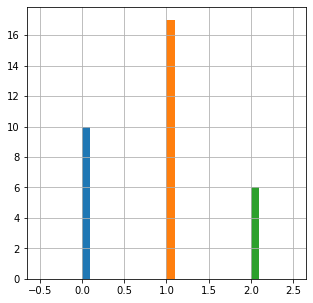

In [24]:
# Overall energy share distribution
energyShare[energyShare['Cluster'] == 0] # 10
energyShare[energyShare['Cluster'] == 1] # 6
energyShare[energyShare['Cluster'] == 2] # 17

clustergraph = energyShare[['country', 'Cluster']].groupby('Cluster')
plot = clustergraph.Cluster.hist(figsize=(5, 5))

In [14]:
kmeans.cluster_centers_
# 'fossil_share_energy','low_carbon_share_energy','biofuel_share_energy', 'coal_share_energy', 'gas_share_energy', 'hydro_share_energy', 'nuclear_share_elec', 'oil_share_energy', 'renewables_share_energy', 'solar_share_energy', 'wind_share_energy'

array([[81.2576    , 18.7424    ,  0.8869    , 10.2701    , 33.48365   ,
         5.21285   , 12.18275   , 37.504     , 13.7226    ,  1.65215   ,
         4.0947    ],
       [88.89985714, 11.10014286,  0.71785714, 44.32071429, 16.34242857,
         4.50171429,  2.54728571, 28.23642857,  9.968     ,  1.45957143,
         2.19971429],
       [51.93333333, 48.06666667,  2.51166667,  5.4885    , 14.42383333,
        21.55816667, 24.6775    , 32.02083333, 34.00066667,  0.64466667,
         5.48866667]])

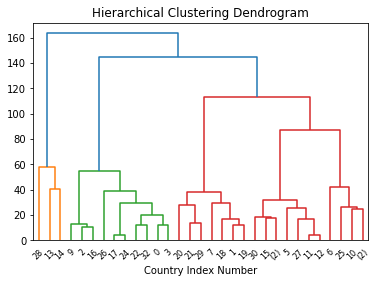

In [96]:
# MODEL 2: Hierarchical Agglomerative Clustering
# Dendrogram to estimate number of (optimal) clusters for data
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = energyShare[energyshares[2:]]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Country Index Number")
plt.show()

In [97]:
agglomerative = AgglomerativeClustering(n_clusters=3) # optimal = 3 clusters
cluster_agg = agglomerative.fit(energyShare[energyshares[2:]]) 
energyShare['Cluster_Agg'] = agglomerative.fit_predict(energyShare[energyshares[2:]]) # predict fit
energyShare
# cluster 0 (agg)
energyShare[energyShare['Cluster_Agg'] == 0] # 20
# cluster 1 (agg)
energyShare[energyShare['Cluster_Agg'] == 1] # 3
# cluster 2 (agg)
energyShare[energyShare['Cluster_Agg'] == 2] # 10

,index,country,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster,Cluster_Agg
0,241,Africa,2020,90.408,9.592,0.015,22.105,29.632,6.814,1.466,38.671,8.849,0.593,1.041,0,2
2,969,Asia Pacific,2020,86.346,13.654,0.243,47.768,12.248,6.478,5.068,26.330,11.357,1.649,2.008,0,2
3,1090,Australia,2020,89.626,10.374,0.104,30.326,26.440,2.318,0.000,32.859,10.374,3.803,3.606,0,2
9,3486,China,2020,84.335,15.665,0.086,56.560,8.182,8.072,4.739,19.593,13.429,1.594,2.848,0,2
16,7372,India,2020,89.744,10.256,0.274,54.830,6.708,4.544,2.859,28.206,9.017,1.630,1.678,0,2
17,7494,Indonesia,2020,92.905,7.095,2.874,42.650,19.584,2.263,0.000,30.671,7.095,0.055,0.055,0,2
22,11392,Non-OECD,2020,86.450,13.550,0.474,36.511,21.896,7.369,5.165,28.042,11.397,1.046,1.722,0,2
24,12584,Poland,2020,92.893,7.107,0.970,41.600,19.339,0.468,0.000,31.954,7.107,0.440,3.481,0,2
26,14094,South Korea,2020,84.600,15.400,0.247,25.697,17.301,0.292,27.648,41.602,3.331,1.248,0.237,0,2
32,16852,World,2020,83.139,16.861,0.676,27.204,24.724,6.856,10.096,31.211,12.553,1.365,2.539,0,2


In [99]:
cluster_0 = energyShare[energyShare['Cluster_Agg'] == 0]
cluster_0.describe()

,index,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster,Cluster_Agg
count,20.00000,20.0,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,7865.30000,2020.0,77.403700,22.596300,1.327400,7.27970,32.979100,8.549950,11.070300,37.145050,18.058200,1.586750,4.450400,1.150000,0.0
std,5268.37783,0.0,11.193574,11.193574,1.602474,5.15802,11.690656,9.418805,11.131778,5.913802,11.045537,1.189891,3.475978,0.366348,0.0
min,847.00000,2020.0,52.815000,1.267000,0.000000,1.01300,9.629000,0.012000,0.000000,22.074000,1.074000,0.090000,0.015000,1.000000,0.0
25%,3007.25000,2020.0,70.765500,14.866500,0.919500,3.12075,25.072750,1.233250,0.467250,34.403500,9.857750,0.541500,2.591500,1.000000,0.0
50%,7148.00000,2020.0,75.515500,24.484500,1.103500,5.11750,29.448000,5.751500,9.330500,36.279000,18.103000,1.621000,3.919000,1.000000,0.0
75%,12047.50000,2020.0,85.133500,29.234500,1.249000,12.29850,39.654500,9.423750,17.893250,42.644500,21.532000,2.092750,5.977000,1.000000,0.0
max,16181.00000,2020.0,98.733000,47.185000,7.804000,15.22600,54.558000,29.349000,39.196000,46.657000,46.054000,3.932000,11.775000,2.000000,0.0


In [100]:
cluster_1 = energyShare[energyShare['Cluster_Agg'] == 1]
cluster_1.describe()

,index,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster,Cluster_Agg
count,3.000000,3.0,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0
mean,8681.333333,2020.0,43.510333,56.489667,1.77400,5.911000,8.325667,16.215000,43.701333,29.273333,30.853000,0.656667,7.333667,2.0,1.0
std,5096.635884,0.0,11.783587,11.783587,0.66484,5.397317,7.720443,12.055343,20.419872,3.961826,17.141535,0.596629,3.664548,0.0,0.0
min,5678.000000,2020.0,29.916000,49.194000,1.27200,2.224000,1.731000,6.255000,30.038000,24.782000,14.086000,0.209000,4.143000,2.0,1.0
25%,5739.000000,2020.0,39.862500,49.692500,1.39700,2.813500,4.079500,9.514000,31.964500,27.774000,22.106500,0.318000,5.332500,2.0,1.0
50%,5800.000000,2020.0,49.809000,50.191000,1.52200,3.403000,6.428000,12.773000,33.891000,30.766000,30.127000,0.427000,6.522000,2.0,1.0
75%,10183.000000,2020.0,50.307500,60.137500,2.02500,7.754500,11.623000,21.195000,50.533000,31.519000,39.236500,0.880500,8.929000,2.0,1.0
max,14566.000000,2020.0,50.806000,70.084000,2.52800,12.106000,16.818000,29.617000,67.175000,32.272000,48.346000,1.334000,11.336000,2.0,1.0


In [101]:
cluster_2 = energyShare[energyShare['Cluster_Agg'] == 2]
cluster_2.describe()

,index,year,fossil_share_energy,low_carbon_share_energy,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_elec,oil_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,Cluster,Cluster_Agg
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0
mean,7557.400000,2020.0,88.044600,11.955400,0.596300,38.525100,18.605400,4.547400,5.704100,30.913900,9.450900,1.342300,1.921500,0.0,2.0
std,6004.315766,0.0,3.546896,3.546896,0.852465,12.186684,7.637927,2.972414,8.340774,6.183994,3.032579,1.023348,1.234347,0.0,0.0
min,241.000000,2020.0,83.139000,7.095000,0.015000,22.105000,6.708000,0.292000,0.000000,19.593000,3.331000,0.055000,0.055000,0.0,2.0
25%,1689.000000,2020.0,85.036500,9.758000,0.138750,27.984500,13.511250,2.276750,0.366500,28.083000,7.542500,0.706250,1.200250,0.0,2.0
50%,7433.000000,2020.0,88.038000,11.962000,0.260500,39.055500,19.461500,5.511000,3.799000,30.941000,9.695500,1.306500,1.865000,0.0,2.0
75%,12286.000000,2020.0,90.242000,14.963500,0.625500,46.488500,24.017000,6.845500,5.140750,32.632750,11.387000,1.621000,2.770750,0.0,2.0
max,16852.000000,2020.0,92.905000,16.861000,2.874000,56.560000,29.632000,8.072000,27.648000,41.602000,13.429000,3.803000,3.606000,0.0,2.0
